In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lidar_data_analyzer import LidarDataSet
from lidar_data_analyzer import radial_distribution, structure_factor_from_g_r

LOG: find_sinkholes: found 284 sinkholes
PLOTTING


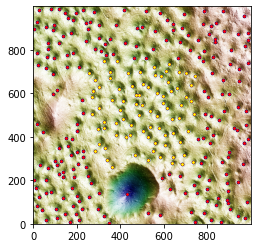

In [5]:
lds1 = LidarDataSet.from_csv_file("./data/dataset2/TM1_445_82.txt")
lds1.find_sinkholes()
lds1.plot(centers=True)

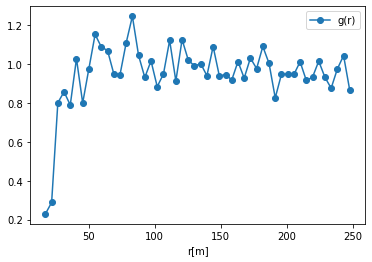

In [6]:
rd_res = radial_distribution(lds1, method="pbc", plot=True, n_bins=50)

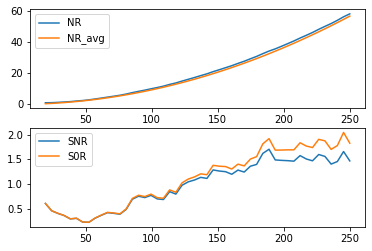

{'bin_r_min': array([ 14.86606875,  19.56862737,  24.27118599,  28.97374462,
         33.67630324,  38.37886187,  43.08142049,  47.78397911,
         52.48653774,  57.18909636,  61.89165498,  66.59421361,
         71.29677223,  75.99933085,  80.70188948,  85.4044481 ,
         90.10700673,  94.80956535,  99.51212397, 104.2146826 ,
        108.91724122, 113.61979984, 118.32235847, 123.02491709,
        127.72747571, 132.43003434, 137.13259296, 141.83515158,
        146.53771021, 151.24026883, 155.94282746, 160.64538608,
        165.3479447 , 170.05050333, 174.75306195, 179.45562057,
        184.1581792 , 188.86073782, 193.56329644, 198.26585507,
        202.96841369, 207.67097232, 212.37353094, 217.07608956,
        221.77864819, 226.48120681, 231.18376543, 235.88632406,
        240.58888268, 245.2914413 ]),
 'bin_r_max': array([ 19.56862737,  24.27118599,  28.97374462,  33.67630324,
         38.37886187,  43.08142049,  47.78397911,  52.48653774,
         57.18909636,  61.89165498,  66.

In [7]:
structure_factor_from_g_r(rd_res["bin_edges"],
                          rd_res["raw_bins"],
                          rd_res["density"],
                          rd_res["N"])

In [8]:
data_segment_filenames = [[f"TM1_{x}_{y}" for y in range(80,84+1)] for x in range(442,447+1)]

selected_range_points = [[1200, 4040],
                         [1586, 3777],
                         [2500, 3440],
                         [2852, 3100],
                         [3290, 2973],
                         [3790, 2382],
                         [3793, 2091],
                         [4470, 1700],
                         [6000, 270],
                         [6000, 0],
                         [4025, 0],
                         [2340, 1646],
                         [2280, 1930],
                         [1492, 2500],
                         [1193, 3120],
                         [465, 3700],
                         [310, 4385],
                         [380, 4600],
                         [619,4700],
                         [1070,4316]]

ldsl = LidarDataSet.from_array_of_csv_files(data_segment_filenames,
                                            filename_prefix="./data/dataset2/",
                                            selected_range_points=selected_range_points)
ldsl.find_sinkholes()

LOG: find_sinkholes: found 6791 sinkholes


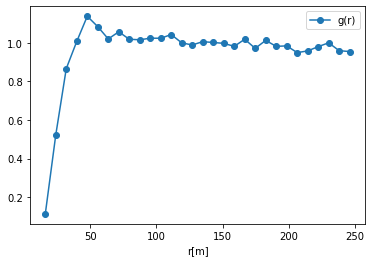

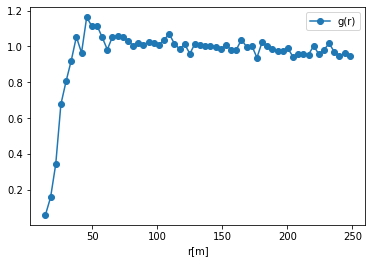

In [9]:
rd_res_30 = radial_distribution(ldsl, method="nonborder", plot=True, n_bins=30)
rd_res_60 = radial_distribution(ldsl, method="nonborder", plot=True, n_bins=60)

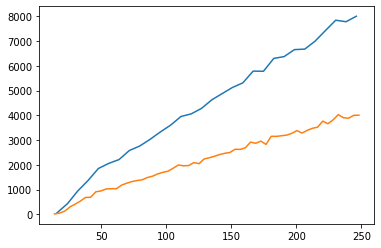

In [10]:
plt.plot(rd_res_30["bin_center_positions"], rd_res_30["raw_bins"])
plt.plot(rd_res_60["bin_center_positions"], rd_res_60["raw_bins"])

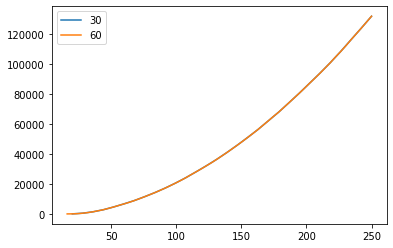

In [11]:
cum_30 = rd_res_30["raw_bins"].cumsum()
cum_60 = rd_res_60["raw_bins"].cumsum()

bin_r_max_30 = (rd_res_30["bin_edges"])[1:]
bin_r_max_60 = (rd_res_60["bin_edges"])[1:]

plt.plot(bin_r_max_30, cum_30, label="30")
plt.plot(bin_r_max_60, cum_60, label="60")
plt.legend()

## Structure factor using fft

In [12]:
from scipy.fft import fft, fftfreq, fftshift

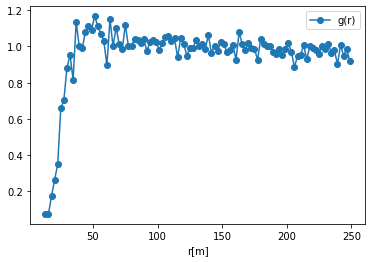

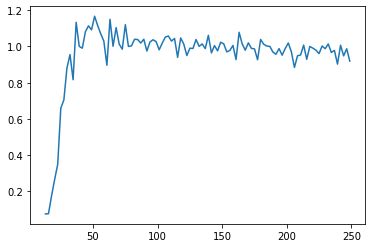

In [13]:
rd_res_200 = radial_distribution(ldsl, method="nonborder", plot=True, n_bins=100)

plt.plot(rd_res_200["bin_center_positions"], rd_res_200["radial_distribution_values"])

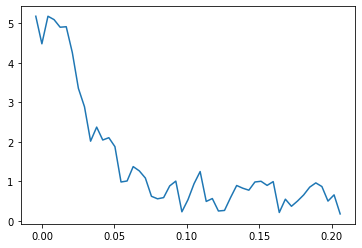

In [22]:
Y = np.absolute(fftshift(fft(rd_res_200["radial_distribution_values"] - 1)))
r_vals = rd_res_200["bin_center_positions"]
N = r_vals.size
X = fftshift(fftfreq(N, d=(r_vals[1] - r_vals[0])))
plt.plot(X[N//2-1:],Y[N//2-1:])

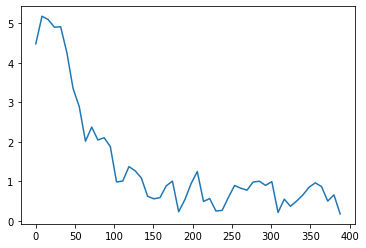

In [17]:
N = len(rd_res_200["radial_distribution_values"])
T = rd_res_200["radial_distribution_values"][1] - rd_res_200["radial_distribution_values"][0]
yf = np.absolute(fft(rd_res_200["radial_distribution_values"] - 1)[:N//2])
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, yf)

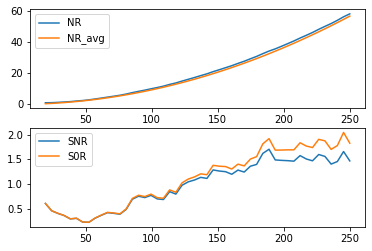

In [16]:
Sk_data = structure_factor_from_g_r(rd_res["bin_edges"],
                          rd_res["raw_bins"],
                          rd_res["density"],
                          rd_res["N"])

In [17]:
print(Sk_data["NR"])

[ 1.03521127  1.0915493   1.28169014  1.52112676  1.77464789  2.14788732
  2.47183099  2.9084507   3.47183099  4.04929577  4.66197183  5.24647887
  5.86619718  6.64084507  7.56338028  8.38028169  9.14788732 10.02816901
 10.83098592 11.73239437 12.84507042 13.78873239 15.         16.14084507
 17.28873239 18.49295775 19.66197183 21.06338028 22.30985915 23.6056338
 24.90140845 26.37323944 27.76056338 29.34507042 30.88732394 32.65492958
 34.32394366 35.73239437 37.38732394 39.08450704 40.81690141 42.71126761
 44.46478873 46.28873239 48.31690141 50.21830986 52.04225352 54.11267606
 56.37323944 58.28169014]


In [18]:
print(Sk_data["NR_avg"])

[ 0.42869223  0.63236053  0.87548969  1.15807972  1.48013062  1.84164239
  2.24261503  2.68304854  3.16294291  3.68229816  4.24111428  4.83939126
  5.47712911  6.15432783  6.87098742  7.62710788  8.42268921  9.25773141
 10.13223448 11.04619841 11.99962322 12.99250889 14.02485544 15.09666285
 16.20793113 17.35866028 18.5488503  19.77850118 21.04761294 22.35618557
 23.70421906 25.09171343 26.51866866 27.98508476 29.49096173 31.03629957
 32.62109828 34.24535786 35.90907831 37.61225962 39.35490181 41.13700486
 42.95856878 44.81959358 46.72007924 48.66002577 50.63943316 52.65830143
 54.71663057 56.81442058]
